In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data
from torch.utils.data import DataLoader 
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
import wandb
import math
import argparse
import datetime
import math
from time import time

In [2]:
res = 128
home = "/home/yc3400/scratch_research/gitrepo/GenerativeDynamics-NumericalDesign/Navier-Stokes/multiscale-interpolation/results/"
arrk = torch.load(home + f"NS-res{res}-kvals.pt") 
arrtruth = torch.load(home + f"NS-res{res}-truth.pt")
arrRK10 = torch.load(home + f"NS-res{res}-standard-schedule-RK10.pt") 
arrRK20 = torch.load(home + f"NS-res{res}-standard-schedule-RK20.pt") 

arrscaledRK10 = torch.load(home + f"NS-res{res}-scaled-schedule-RK10.pt")
arrscaledRK20 = torch.load(home + f"NS-res{res}-scaled-schedule-RK10.pt")



/state/partition1/job-63542623/ipykernel_2168782/1395871300.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  arrk = torch.load(home + f"NS-res{res}-kvals.pt")
/state/part

/state/partition1/job-63542623/ipykernel_2168782/726455596.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(arrk, arrtruth, 'o-', marker=markers[0], markersize=8, markevery=5, linestyle='-', label="truth", linewidth=2)
/state/partition1/job-63542623/ipykernel_2168782/726455596.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(arrk, arrtruth, 'o-', marker=markers[0], markersize=8, markevery=5, linestyle='-', label="truth", linewidth=2)
/state/partition1/job-63542623/ipykernel_2168782/726455596.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(arrk, arrscaledRK10, 'o-', marker=markers[4], marker

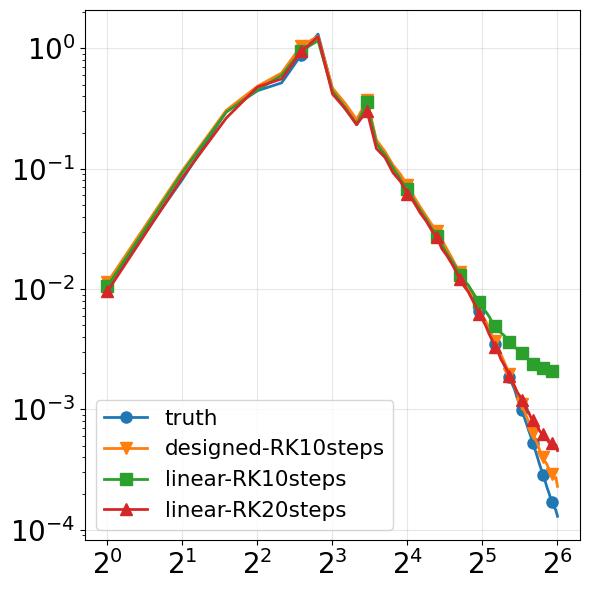

In [3]:

plt.figure(figsize=(6, 6))
markers = ['o', 's', '^', 'd', 'v']

plt.plot(arrk, arrtruth, 'o-', marker=markers[0], markersize=8, markevery=5, linestyle='-', label="truth", linewidth=2)
plt.plot(arrk, arrscaledRK10, 'o-', marker=markers[4], markersize=8, markevery=5, linestyle='-', label="designed-RK10steps", linewidth=2)
# plt.plot(arrk, arrscaledRK20, 'o-', marker=markers[4], markersize=8, markevery=5, linestyle='-', label="designed-RK20steps", linewidth=2)
plt.plot(arrk, arrRK10, 'o-', marker=markers[1], markersize=8, markevery=5, linestyle='-', label="linear-RK10steps", linewidth=2)
plt.plot(arrk, arrRK20, 'o-', marker=markers[2], markersize=8, markevery=5, linestyle='-', label="linear-RK20steps", linewidth=2)

plt.legend(fontsize=15.5)
plt.grid(alpha=0.3)
plt.xscale('log', base = 2)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=20)  # Change 14 to your desired size
plt.locator_params(axis='x', numticks=7)  # Adjust number as needed

plt.tight_layout()
plt.savefig(f"NS-res{res}-energy spectrum.pdf", dpi=300)